# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [103]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [104]:
# rename columns
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
# drop rows with n/a values
df.dropna()
print(df.isna().sum())

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Reading

How many years of data are logged in our dataset? 

In [105]:
# @@@ 1
# Your Code
print(df["YEAR"].unique)

<bound method Series.unique of 0       1992
1       1992
2       1992
3       1992
4       1992
        ... 
1710    2019
1711    2019
1712    2019
1713    2019
1714    2019
Name: YEAR, Length: 1715, dtype: int64>


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

Michigan Avg 4th Grade Reading Score:  217.83333333333334
Ohio Avg 4th Grade Reading Score:  223.1818181818182


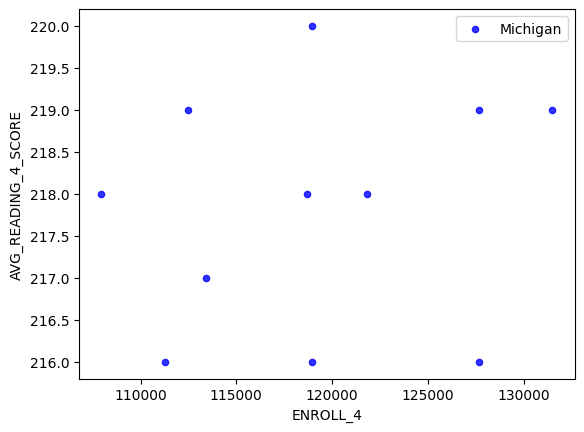

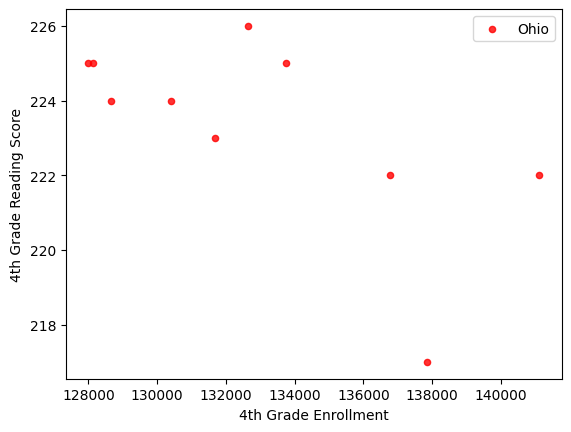

In [106]:
# @@@ 2
# make plots to visualize Michigan and Ohio scores
df[df["STATE"] == "MICHIGAN"].plot.scatter(x='ENROLL_4', y='AVG_READING_4_SCORE', alpha=0.8, label="Michigan", color = "blue")
df[df["STATE"] == "OHIO"].plot.scatter(x='ENROLL_4', y='AVG_READING_4_SCORE', alpha=0.8, label="Ohio", color="red")

# calculate the means for both states
mi_avg = df[df["STATE"] == "MICHIGAN"]['AVG_READING_4_SCORE'].mean()
ohio_avg = df[df["STATE"] == "OHIO"]["AVG_READING_4_SCORE"].mean()

print("Michigan Avg 4th Grade Reading Score: ", mi_avg)
print("Ohio Avg 4th Grade Reading Score: ", ohio_avg)

plt.xlabel('4th Grade Enrollment')
plt.ylabel('4th Grade Reading Score')
plt.legend()
plt.show()

Find the average for your chosen test across all states in 2019

In [107]:
# @@@ 3
df["AVG_READING_4_SCORE"].mean()

np.float64(218.80615384615385)

For each state, find a maximum value for your chosen test score

In [108]:
# @@@ 4
# make a groupby object for states and their avg grade 4 reading score
max_scores = df.groupby("STATE")['AVG_READING_4_SCORE'].max()

print(max_scores.head())

STATE
ALABAMA       220.0
ALASKA        214.0
ARIZONA       216.0
ARKANSAS      219.0
CALIFORNIA    216.0
Name: AVG_READING_4_SCORE, dtype: float64


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [109]:
# @@@ 5
# new column for federal/state/local revenue to total revenue
df["FEDERAL_REVENUE_OUT_OF_TOTAL"] = df["FEDERAL_REVENUE"] / df["TOTAL_REVENUE"]
df["STATE_REVENUE_OUT_OF_TOTAL"] = df["STATE_REVENUE"] / df["TOTAL_REVENUE"]
df["LOCAL_REVENUE_OUT_OF_TOTAL"] = df["LOCAL_REVENUE"] / df["TOTAL_REVENUE"]

# new column for enrollment out of reading scores
df["ENROLLMENT_TO_SCORE_RATIO"] = df['ENROLL_4'] / df['AVG_READING_4_SCORE']

# instruction expenditure per student
df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']


Feature engineering justification: I added several columns that calculate the ratios of different levels of revenue to total revenue, as the ratio of federal or state revenue could affect the resources and scores the students receive. I also have a column to compare enrollment to reading scores and instruction expenditures per student to see if they affect a student's score or the expenditures per student.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

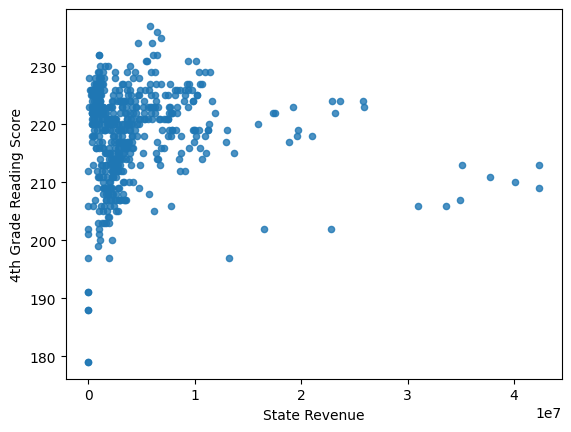

In [110]:
# @@@ 6
df.plot.scatter(x='STATE_REVENUE', y='AVG_READING_4_SCORE', alpha=0.8)
plt.xlabel('State Revenue')
plt.ylabel('4th Grade Reading Score')

The graph of State Revenue by 4th Grade Reading Score shows that majority of state revenue is around $0-1x10^7, resulting in reading scores ranging from 200 to 230. It appears that fewer higher state revenues of $4x10&7 exist and result in reading scores of around 210. There doesn't seem to be a pattern to the points but it is highly right-skewed.

**Visualization 2**

Text(0.5, 1.0, '4th Grade Reading Score Over Time')

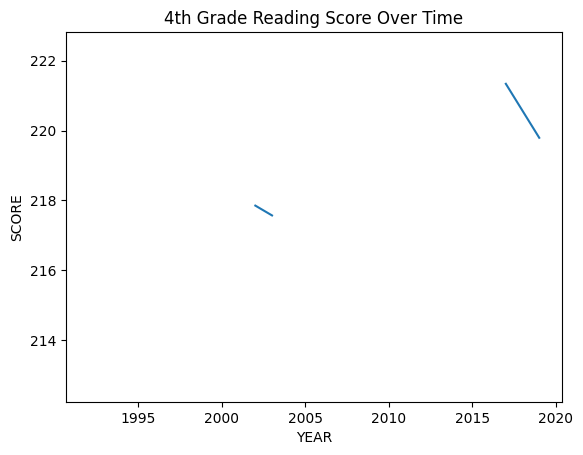

In [111]:
# @@@ 7
df.groupby('YEAR')["AVG_READING_4_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade Reading Score Over Time')

The graph of 4th grade reading scores by year appears to show an increase in score from the early 2000s to around 2018. The line representing the mean scores across 4th graders in the U.S. increased from just under 218 to over 220.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
# @@@ 8

X = df[['ENROLL_4','AVG_READING_8_SCORE','AVG_MATH_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [114]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [115]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [116]:
# @@@ 11
# create your model here
model = LinearRegression()

In [117]:
model.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [119]:
# @@@ 12
# Check the R^2 value
model.score(X_test, y_test)

# Check the mean value
np.mean(model.predict(X_test)-y_test)

# Check the mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

# Check the root mean squared error 
np.mean((model.predict(X_test)-y_test)**2)**0.5

np.float64(3.0910127636797147)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

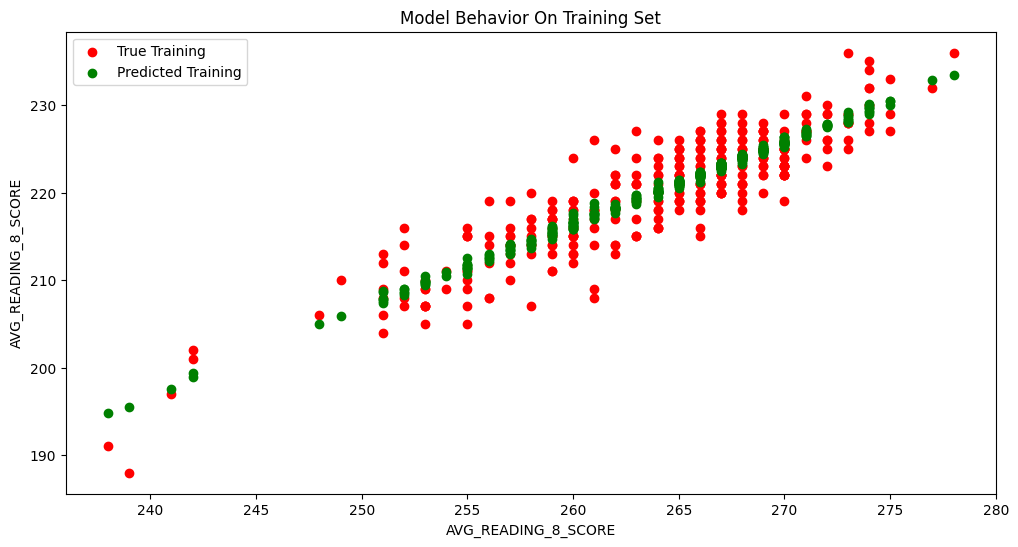

In [120]:
# @@@ 13

col_name = 'AVG_READING_8_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

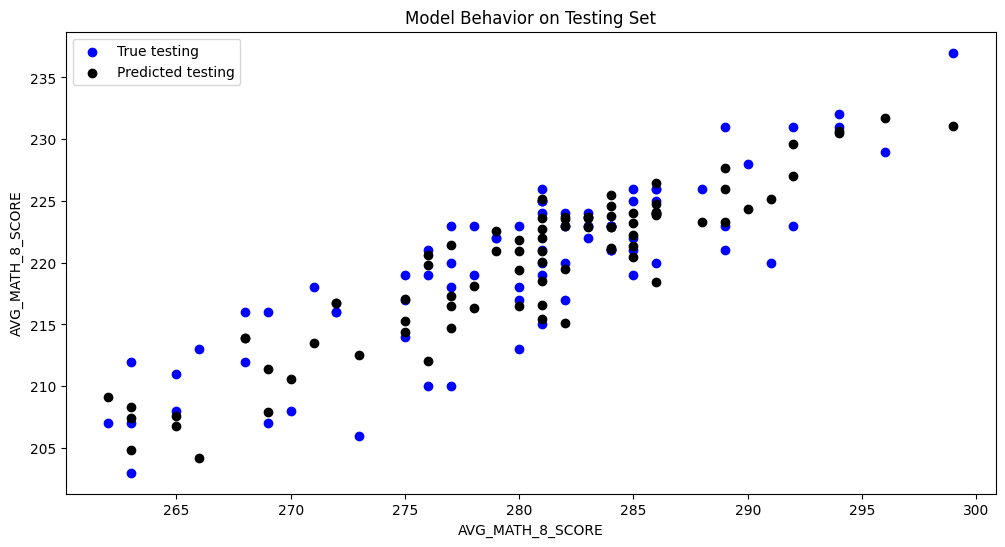

In [121]:
# @@@ 14


col_name = 'AVG_MATH_8_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")